# INSAID Hiring Exercise

### Importing the data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### This is a binary classification problem statement.

### Understanding the data - EDA 

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# converting dtype for totalcharges (object to float type)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## HANDLING MISSING VALUES

In [8]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [9]:
g= df['TotalCharges'].mean()
g

2283.3004408418697

In [10]:
g= df['TotalCharges'].median()
g

1397.475

In [11]:
def impute_nan(df, feat):
    m=df[feat].median()
    df[feat]=df[feat].fillna(m)

impute_nan(df, 'TotalCharges')

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


### Data Visualization

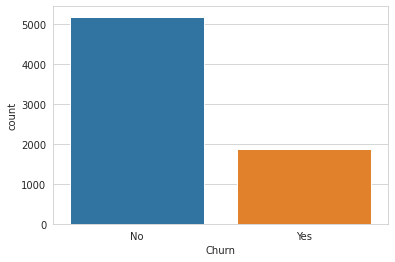

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Churn', data=df)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

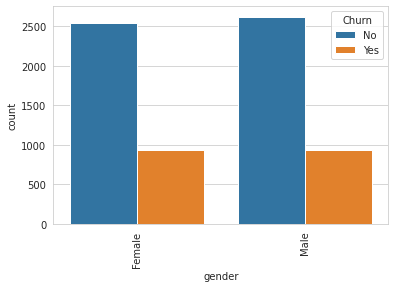

In [15]:
sns.countplot(data = df, x = "gender",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

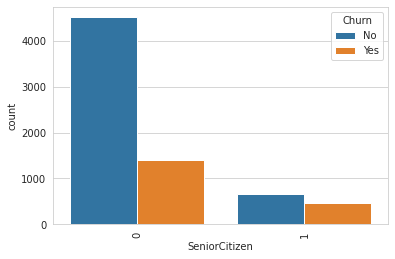

In [16]:
sns.countplot(data = df, x = "SeniorCitizen",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

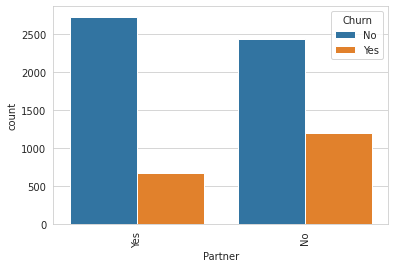

In [17]:
sns.countplot(data = df, x = "Partner",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

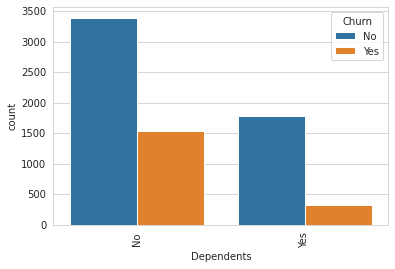

In [18]:
sns.countplot(data = df, x = "Dependents",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

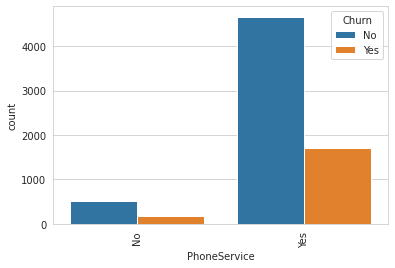

In [19]:
sns.countplot(data = df, x = "PhoneService",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

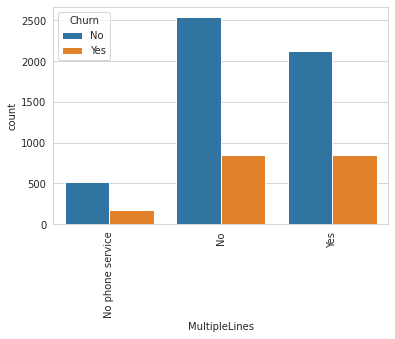

In [20]:
sns.countplot(data = df, x = "MultipleLines",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

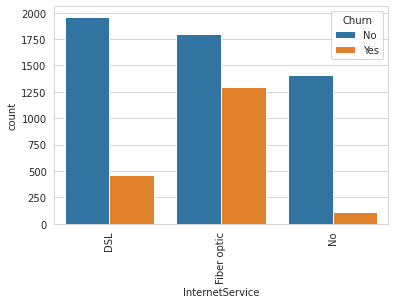

In [21]:
sns.countplot(data = df, x = "InternetService",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

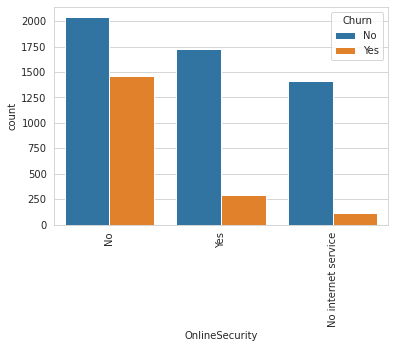

In [22]:
sns.countplot(data = df, x = "OnlineSecurity",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

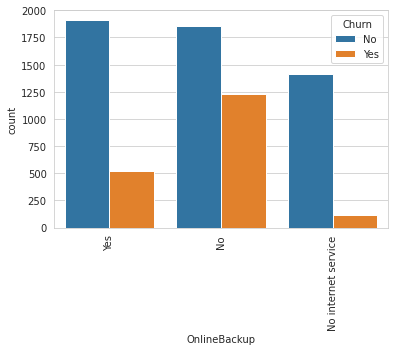

In [23]:
sns.countplot(data = df, x = "OnlineBackup",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

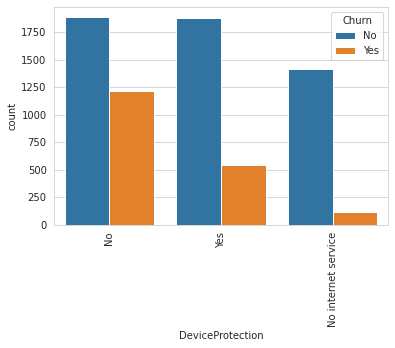

In [24]:
sns.countplot(data = df, x = "DeviceProtection",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

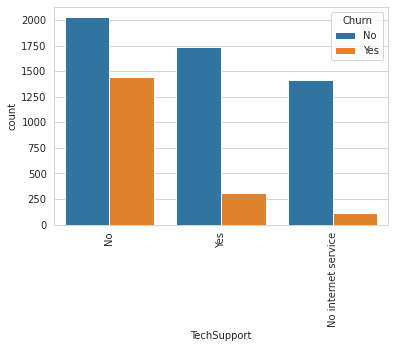

In [25]:
sns.countplot(data = df, x = "TechSupport",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

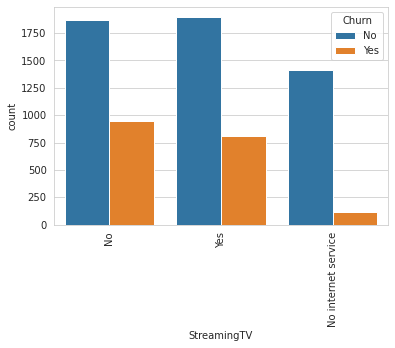

In [26]:
sns.countplot(data = df, x = "StreamingTV",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

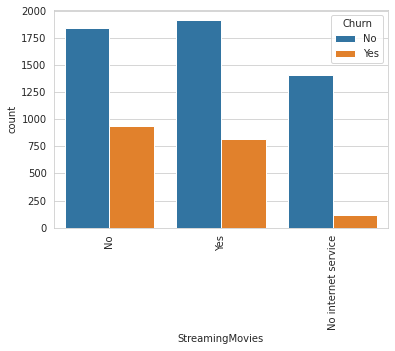

In [27]:
sns.countplot(data = df, x = "StreamingMovies",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

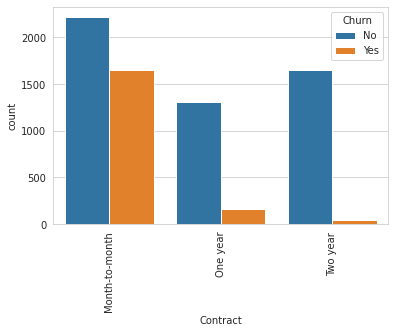

In [28]:
sns.countplot(data = df, x = "Contract",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

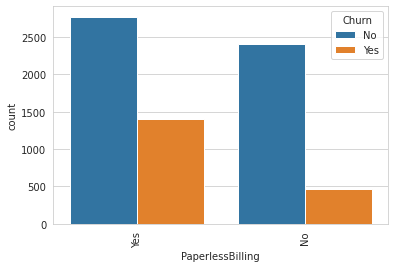

In [29]:
sns.countplot(data = df, x = "PaperlessBilling",hue = "Churn")
plt.xticks(rotation =90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

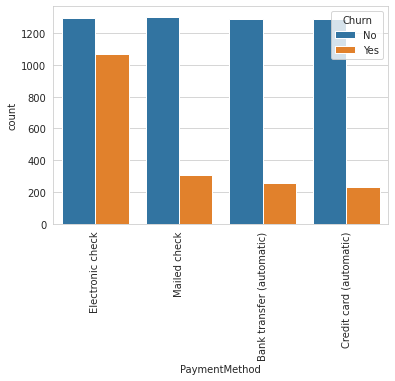

In [30]:
sns.countplot(data = df, x = "PaymentMethod",hue = "Churn")
plt.xticks(rotation =90)

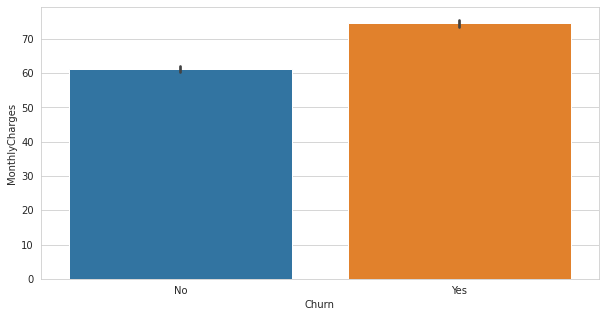

In [31]:
#understanding outlet_identifier depending on item_outlet_sales
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "Churn", y= "MonthlyCharges")

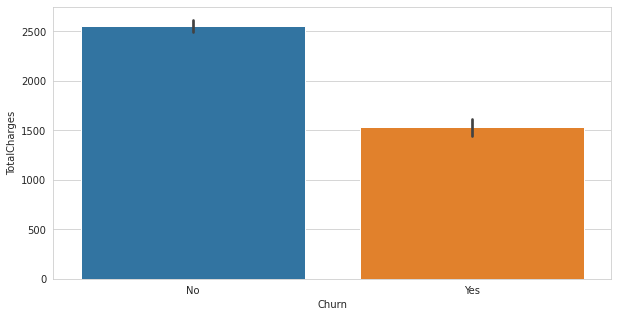

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "Churn", y= "TotalCharges")

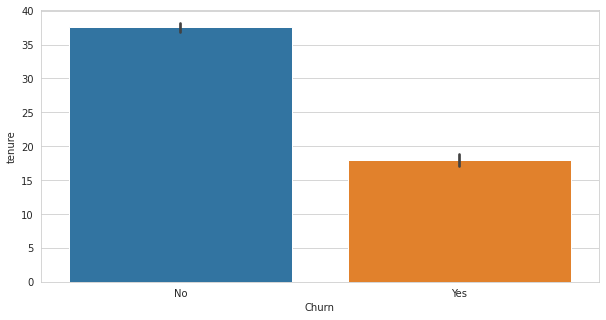

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "Churn", y= "tenure")

### Conclusion from the above charts :

    
    1. Payment methods : the favorite means of payments are Electronic Check, Bank transfer and credit card, Mailed check is the less used in all contracts types.
    2. Streaming Movies : the most customers that consume this service are partners
    3. Internet Service custmers with large tenure tend to make online Seciruty.
    4. Large tenure is significant whith paperless billing ( the company should prioritizee this mean of payment).
    5. Presence of a phone service and tech support play an important role in preventing customer churn
    6. Contracts without paperless billing are less likely to churn than paperless billing.  
    7. Customers with DSL service are propotionally less likely to churn than with fiber optic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

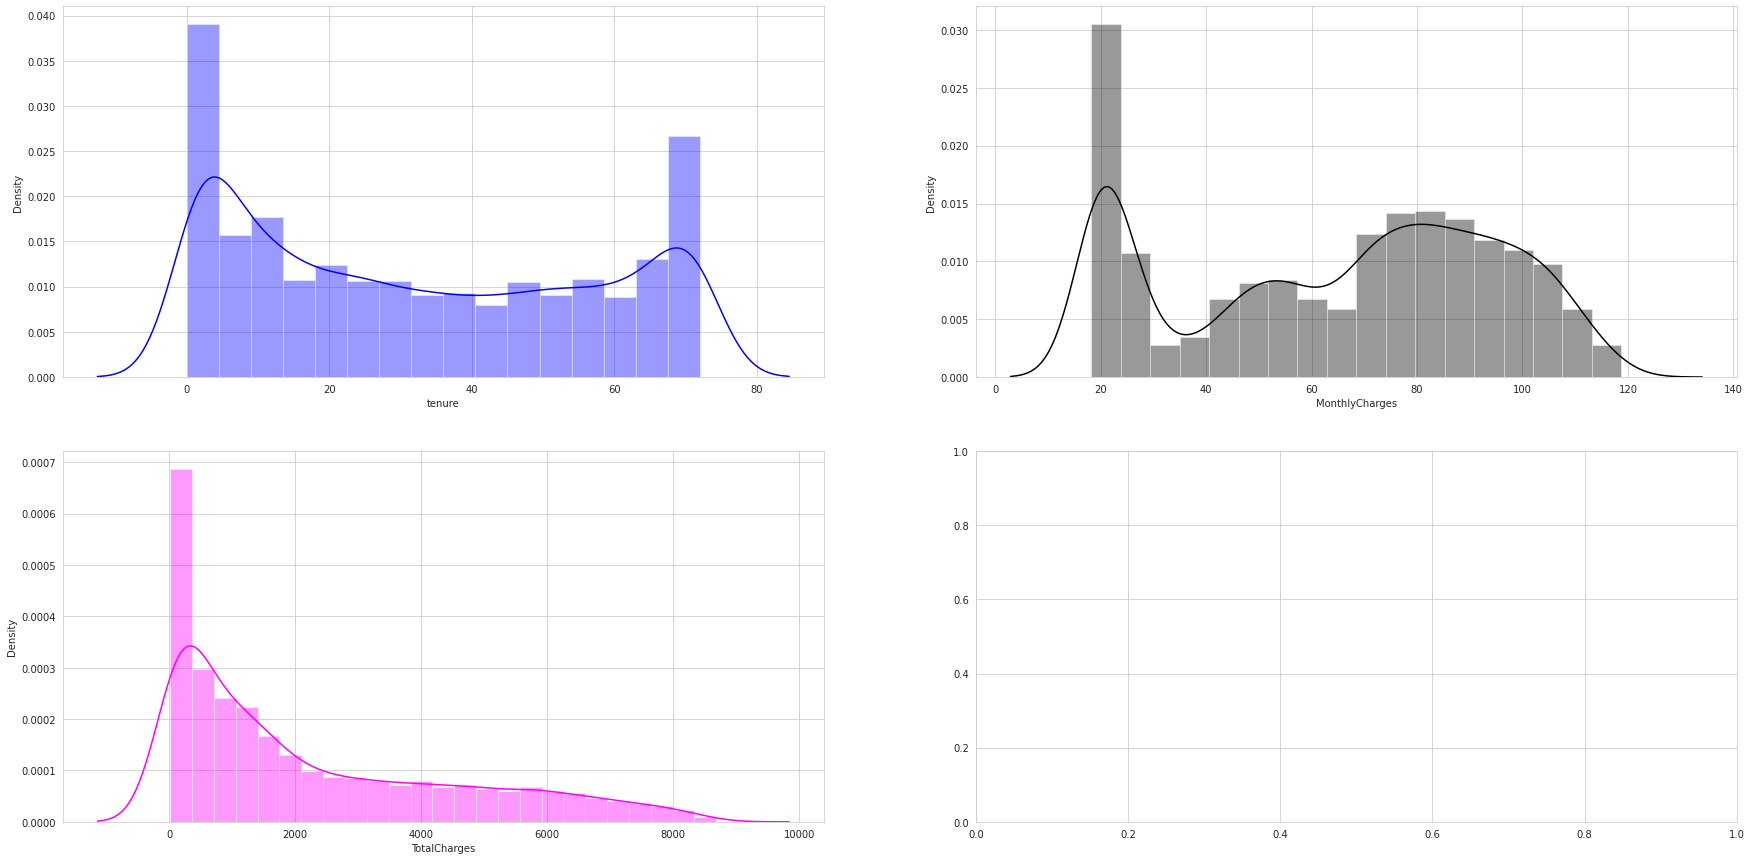

In [34]:
# checking the numercial category follows normal distribution
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.distplot(df["tenure"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["MonthlyCharges"], kde =True, ax=ax[0,1], color = "black")
sns.distplot(df["TotalCharges"], kde =True, ax=ax[1,0], color = "magenta")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


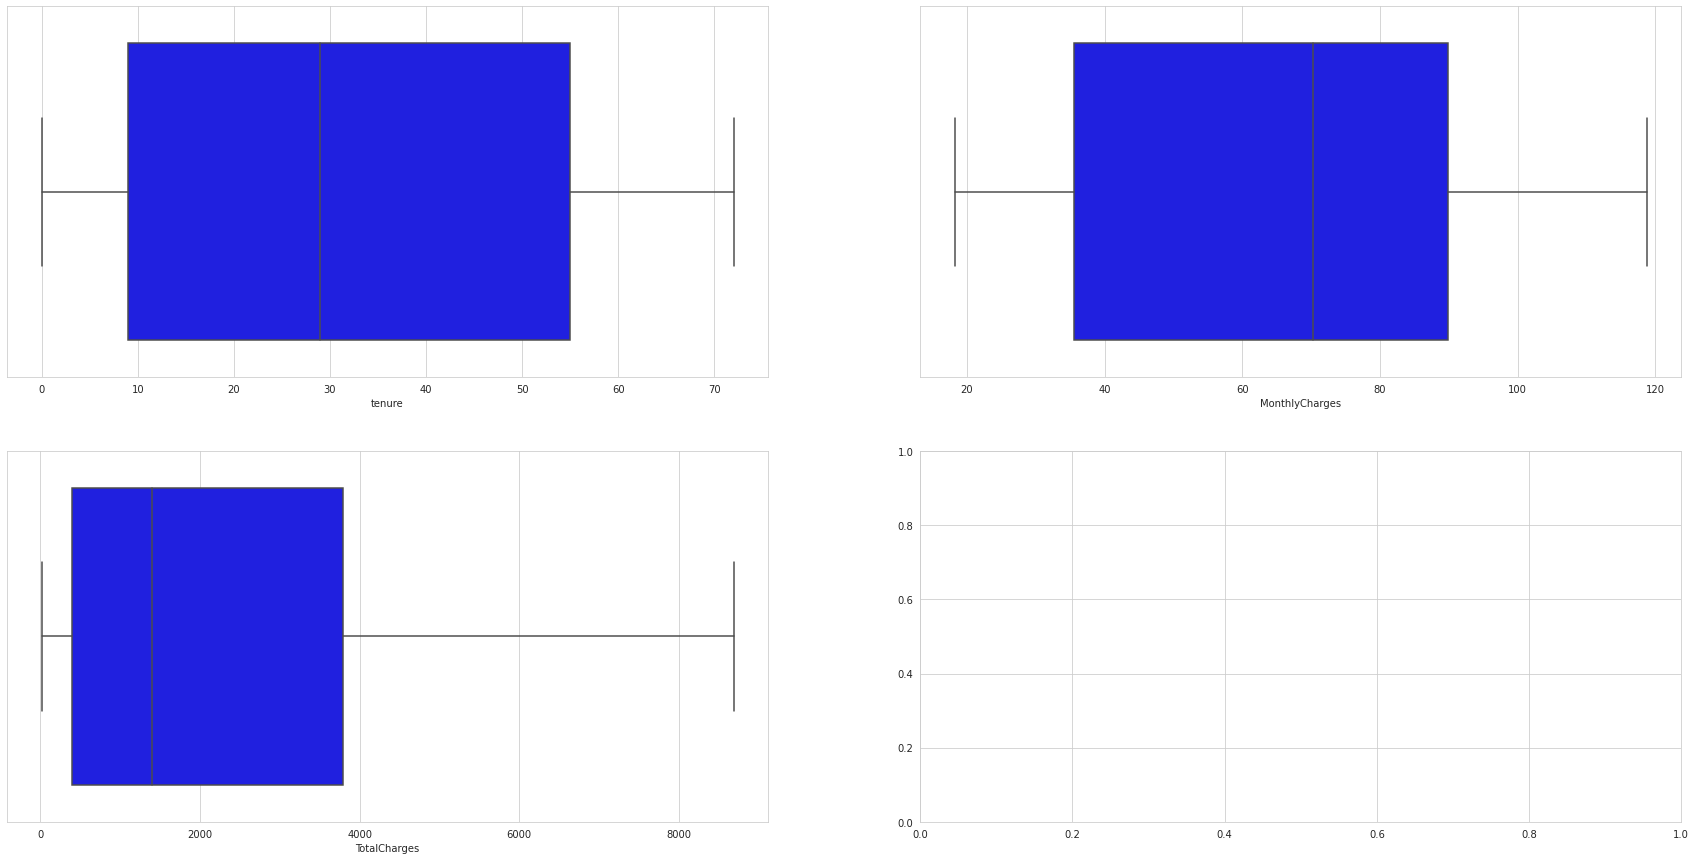

In [35]:
# checking for outliers in numerical category by using boxplot
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df['tenure'], ax=ax[0,0], color = "blue")
sns.boxplot(df['MonthlyCharges'], ax=ax[0,1], color = "blue")
sns.boxplot(df['TotalCharges'], ax=ax[1,0], color = "blue")

In [36]:
### there is no outliers in the numerical category.

### Feature Engineering

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [39]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [40]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [41]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [42]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [43]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [44]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [45]:
# 'no phone service' and 'no internet service' come under 'no' category. so we convert that into 'no'.
df['MultipleLines'] = df['MultipleLines'].str.replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].str.replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].str.replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].str.replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].str.replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].str.replace('No internet service', 'No')

In [46]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [47]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [48]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [49]:
#Label Encoding
g = {'No': 0, 'Yes': 1}
f = {'Male' : 0, 'Female' : 1}
df['gender'] = df['gender'].map(f)
df['Partner'] = df['Partner'].map(g)
df['Dependents'] = df['Dependents'].map(g)
df['MultipleLines'] = df['MultipleLines'].map(g)
df['PhoneService'] = df['PhoneService'].map(g)
df['OnlineSecurity'] = df['OnlineSecurity'].map(g)
df['OnlineBackup'] = df['OnlineBackup'].map(g)
df['DeviceProtection'] = df['DeviceProtection'].map(g)
df['TechSupport'] = df['TechSupport'].map(g)
df['StreamingTV'] = df['StreamingTV'].map(g)
df['StreamingMovies'] = df['StreamingMovies'].map(g)
df['PaperlessBilling'] = df['PaperlessBilling'].map(g)
df['Churn'] = df['Churn'].map(g)

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [52]:
df.groupby(['InternetService'])['Churn'].mean()

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

In [53]:
col = ['InternetService', 'Contract', 'PaymentMethod']

In [54]:
#performing mean encoding
for feat in col:
  m=df.groupby([feat])['Churn'].mean().to_dict()
  df[feat]=df[feat].map(m)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,0.189591,0,1,0,0,0,0,0.427097,1,0.452854,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,0.189591,1,0,1,0,0,0,0.112695,0,0.191067,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,0.189591,1,1,0,0,0,0,0.427097,1,0.191067,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,0.189591,1,0,1,1,0,0,0.112695,0,0.167098,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,0.418928,0,0,0,0,0,0,0.427097,1,0.452854,70.70,151.65,1


In [55]:
# perform one hot encoding
#ise=pd.get_dummies(df['InternetService'], drop_first=True)
#ct=pd.get_dummies(df['Contract'], drop_first=True)
#pm=pd.get_dummies(df['PaymentMethod'], drop_first=True)

In [56]:
#df.drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1, inplace=True)
#df=pd.concat([df, ise, ct, pm], axis=1)
#df.head()

In [57]:
#d=df.loc[:,df.columns!='Churn']
#d['Churn']=df['Churn']
#d.head()

In [58]:
#df=d
#df.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ee6b8ebd0>,
      dtype=object)

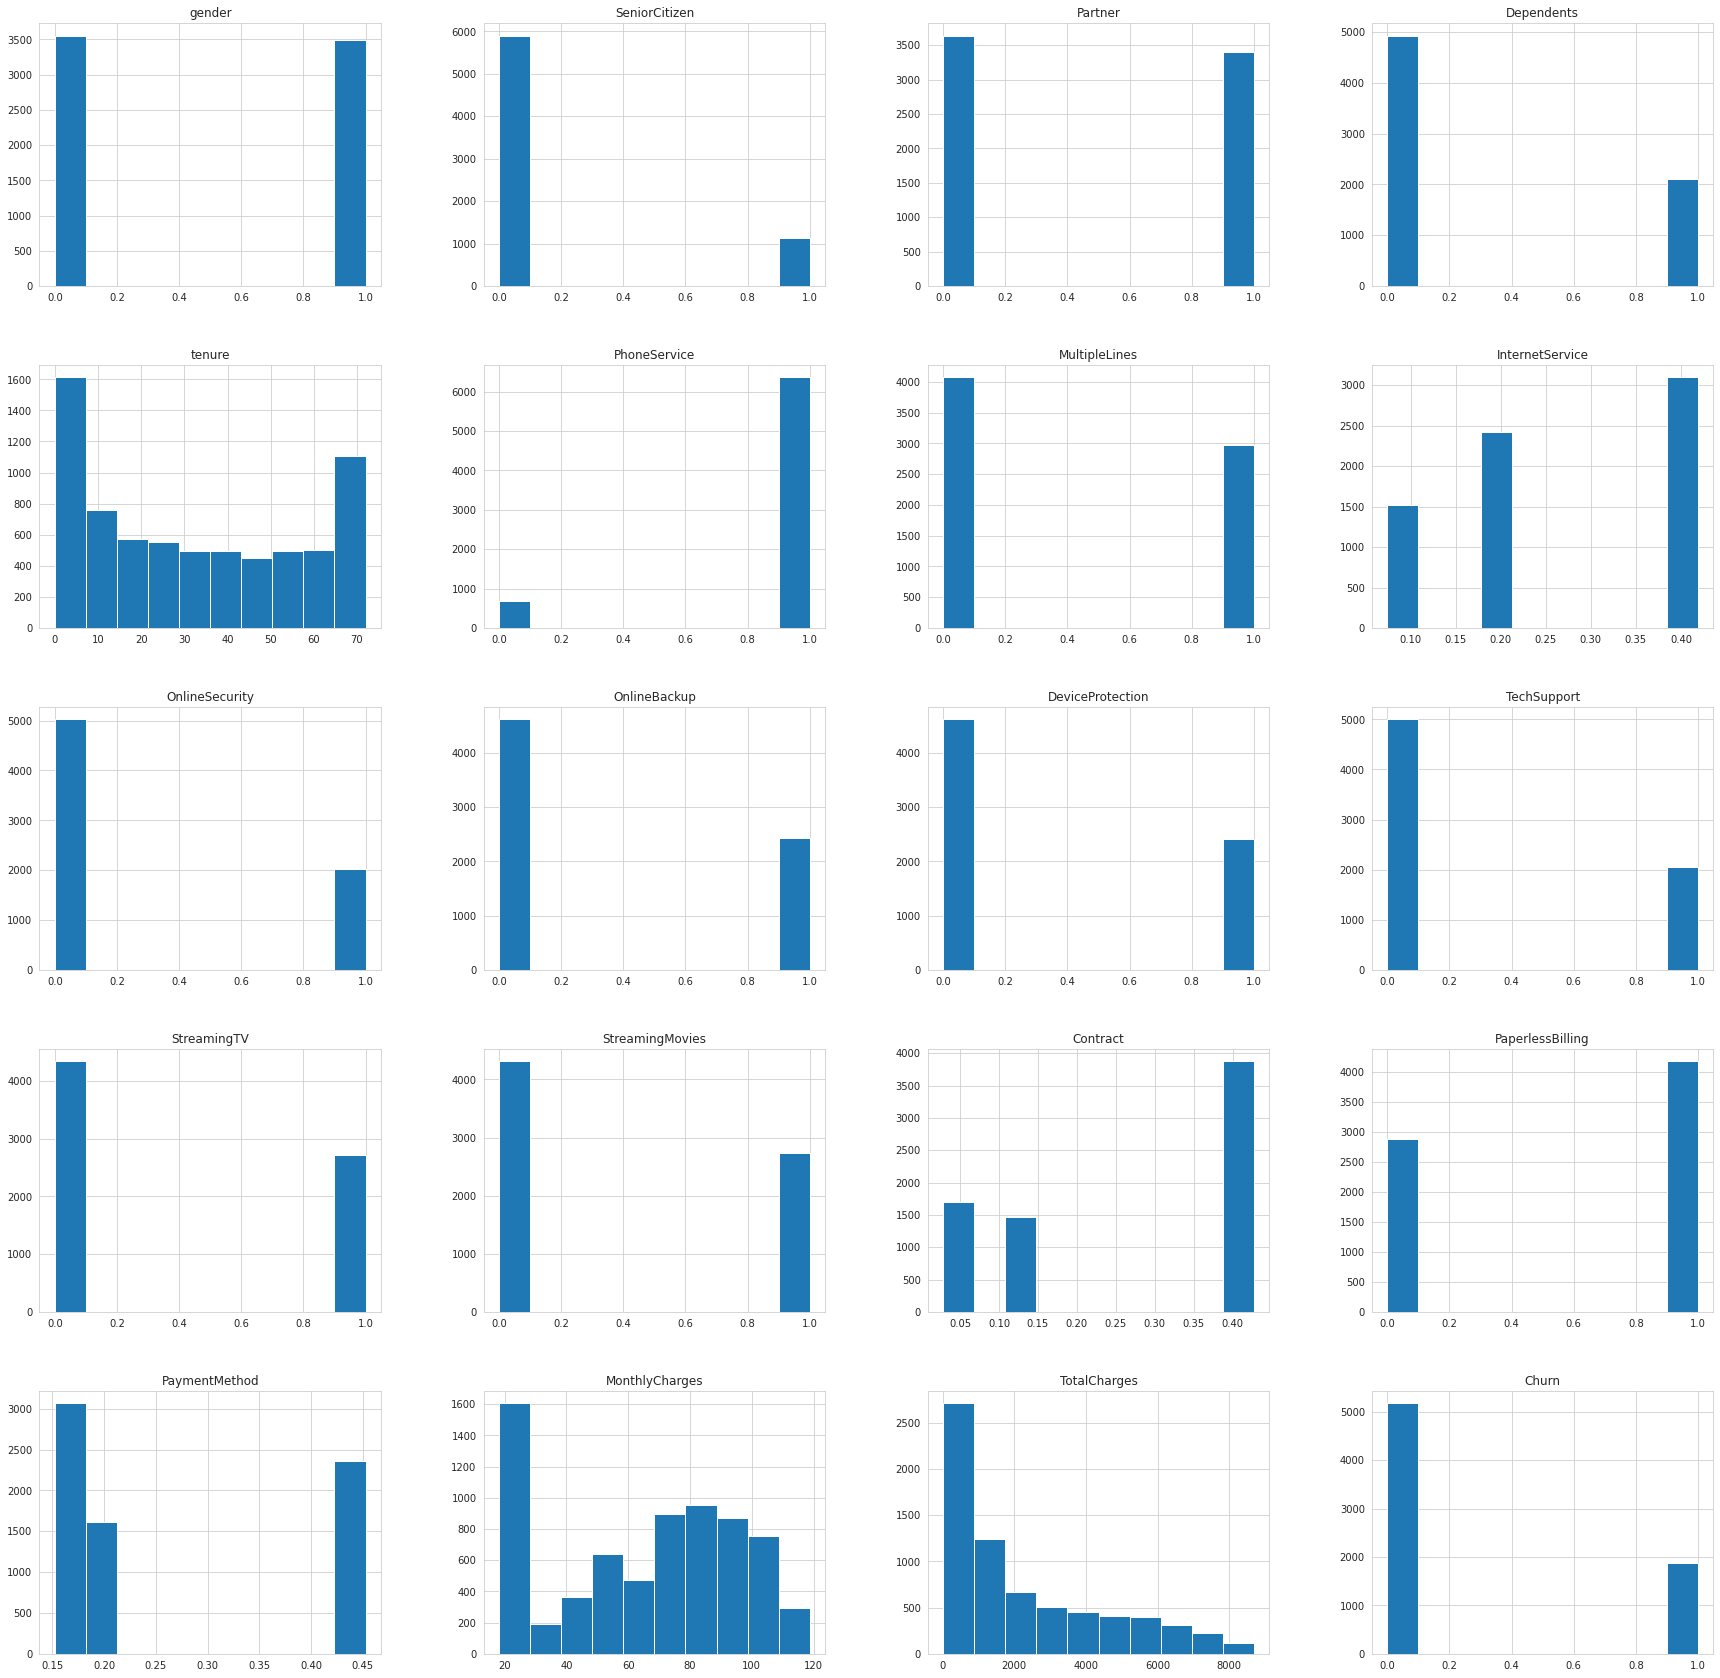

In [59]:
df.hist(figsize=(30,30))

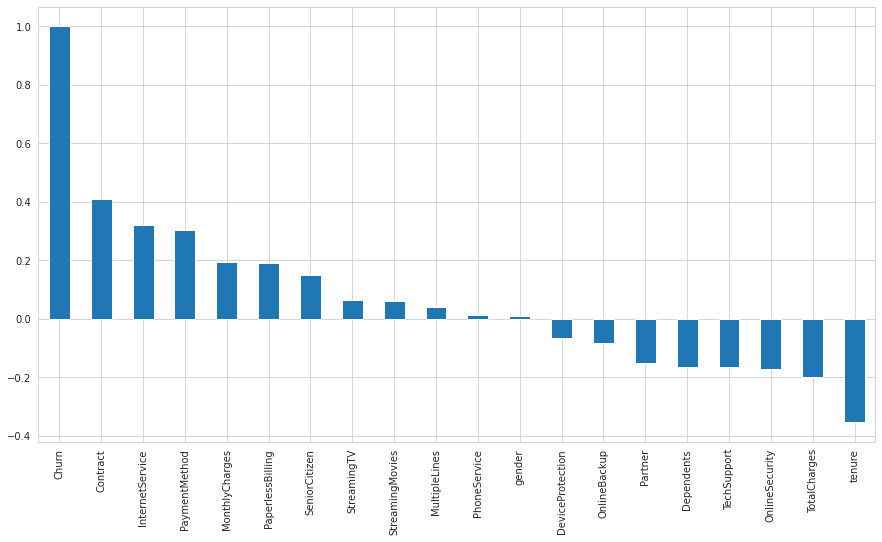

In [60]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')



Observations

Contracts, absence of online security and tech support seem to be positively correlated with churn. While tenure seems to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.


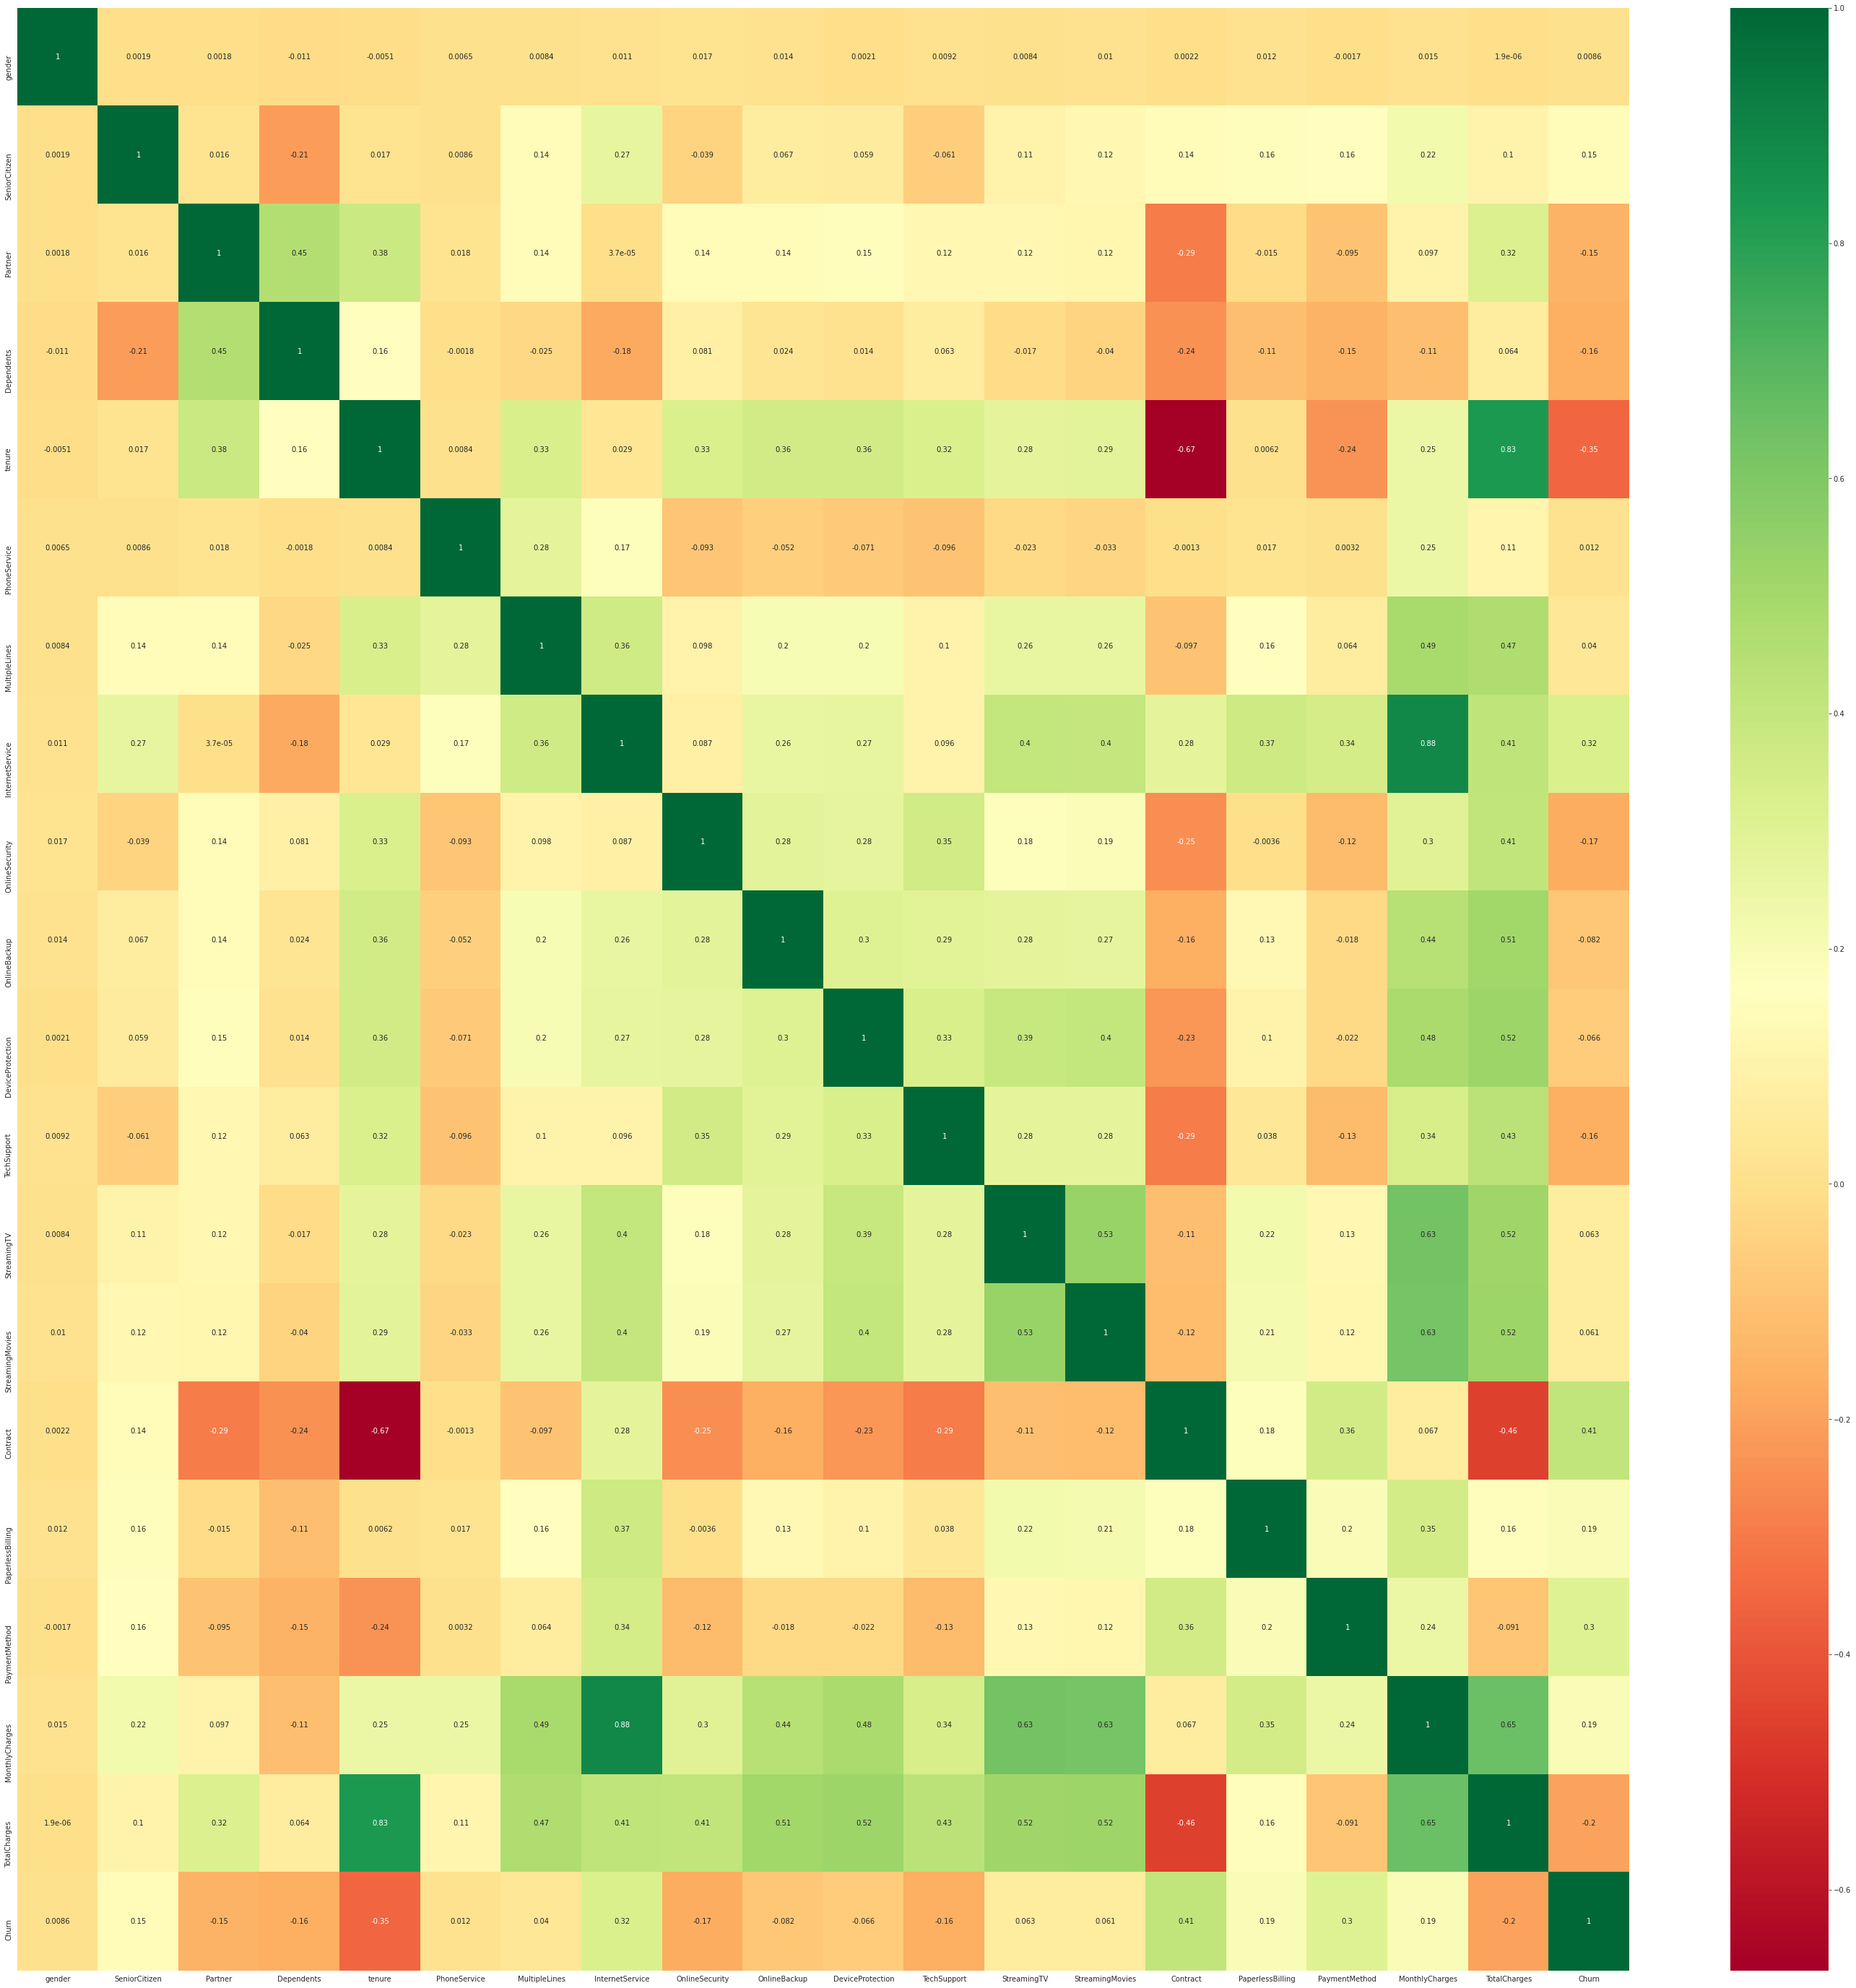

In [61]:
# plotting correlation heatmap for how many columns are correlated with each other
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

### Inference : 
1. Apart from the expected correlation between partners and dependants, there is a strong correlation between the phone service and presence of multiple lines (or multiple phone numbers for the same customer). 
2. No significant info can be recorded with Contract , Gender and Tenure features. 
3. No significant info can be recorded with Internet Service , Gender and Tenure features.
4. There is a strong correlation between the internet service and monthly charges.
5. There is a strong correlation between the total charges and Tenure.

### Implement Machine Learning Models and Model Evaluation




In [62]:
#unique ids for customer. So we are going to drop customerid column.
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0.189591,0,1,0,0,0,0,0.427097,1,0.452854,29.85,29.85,0
1,0,0,0,0,34,1,0,0.189591,1,0,1,0,0,0,0.112695,0,0.191067,56.95,1889.50,0
2,0,0,0,0,2,1,0,0.189591,1,1,0,0,0,0,0.427097,1,0.191067,53.85,108.15,1
3,0,0,0,0,45,0,0,0.189591,1,0,1,1,0,0,0.112695,0,0.167098,42.30,1840.75,0
4,1,0,0,0,2,1,0,0.418928,0,0,0,0,0,0,0.427097,1,0.452854,70.70,151.65,1


In [63]:
train=df.iloc[:4001,:]
test=df.iloc[4001:,:]

In [64]:
train.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3996,0,0,0,0,24,1,0,0.074050,0,0,0,0,0,0,0.028319,0,0.191067,20.75,487.05,0
3997,1,0,1,0,69,1,0,0.189591,0,1,0,0,0,1,0.028319,1,0.152431,61.45,4131.20,0
3998,0,0,1,1,42,1,0,0.189591,1,1,0,0,0,0,0.427097,0,0.191067,54.50,2301.15,0
3999,1,1,0,0,2,1,0,0.418928,0,0,0,0,0,0,0.427097,1,0.452854,69.60,131.65,1
4000,1,1,0,0,39,1,1,0.418928,0,0,1,0,1,1,0.427097,1,0.452854,99.75,4036.00,0


In [65]:
x_train=train.drop(['Churn'], axis = 1)
y_train=train['Churn']
x_train.shape, y_train.shape

((4001, 19), (4001,))

In [66]:
x_test = test.drop(['Churn'], axis = 1)
y_test= test['Churn']

#### RANDOM FOREST MODEL

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2230
           1       0.67      0.50      0.57       812

    accuracy                           0.80      3042
   macro avg       0.75      0.71      0.72      3042
weighted avg       0.79      0.80      0.79      3042

[[2024  206]
 [ 403  409]]
accuracy is 0.7998027613412229


In [69]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8330496587068413

#### XGBOOST CLASSIFIER

In [70]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2230
           1       0.67      0.52      0.58       812

    accuracy                           0.80      3042
   macro avg       0.75      0.71      0.73      3042
weighted avg       0.79      0.80      0.79      3042

[[2024  206]
 [ 393  419]]
accuracy is 0.8030900723208415


In [72]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8369458128078818

#### HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER

In [73]:
params={'n_estimators': [100, 200, 300, 400, 500, 600, 800],
        'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30],
         'min_samples_leaf' : [1, 3, 5, 7],
        'max_features' : [1, 2, 3, 4, 5], 
        'criterion' : ['gini', 'entropy']}

In [74]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf=RandomForestClassifier()

In [76]:
random_search=RandomizedSearchCV(clf, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [77]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



In [79]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf, x_train, y_train, cv=10)

In [80]:
score

array([0.81546135, 0.795     , 0.8225    , 0.8175    , 0.785     ,
       0.795     , 0.8225    , 0.79      , 0.785     , 0.7775    ])

In [81]:
score.mean()

0.8005461346633418

In [82]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.8030900723208415

In [84]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8390057213545693

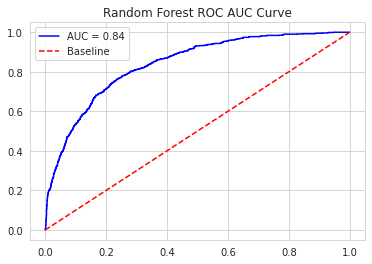

In [85]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Random Forest ROC AUC Curve")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

#### HYPERPARAMETER TUNING FOR XGBOOST CLASSIFIER

In [86]:
import xgboost

In [87]:
params={'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30],
         'min_child_weight' : [1, 3, 5, 7],
        'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4], 
        'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]}

In [88]:
clf=xgboost.XGBClassifier()

In [89]:
random_search=RandomizedSearchCV(clf, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [90]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf, x_train, y_train, cv=10)

In [93]:
score

array([0.80798005, 0.795     , 0.825     , 0.8175    , 0.7875    ,
       0.8       , 0.8275    , 0.7925    , 0.795     , 0.79      ])

In [94]:
score.mean()

0.8037980049875312

In [95]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.8060486522024983

In [97]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8407792860456382

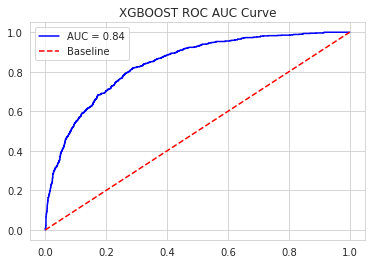

In [98]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("XGBOOST ROC AUC Curve")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

### Final Conclusions

After testing the above mentioned models, I fit a xgboost classifier model using all of the features. The AUC for the model is 0.84. I used recall (sensitivity) as my main metric.

# Q & A

###1. Data cleaning including missing values, outliers and multi-collinearity. Describe your predictive churn model. How did you select variables to be included in the model?

    Missing values are present in total charges (11 values). So i use the statistics (median) method to impute missing values. Outliers are not present in the dataset by using boxplot visualization. There are lot of correlated features (multicollinearity) present in the dataset. But i still take all features to my machine learning model.

###2. Demonstrate the predictive performance of the model. 

XGBoost classifier has always been an influential method in data science. I found that the accuracy of the model is close to 80% on both training and testing datasets. The accuracy is significantly enough and implies that the model is robust. 


###3. What are the key factors that predict customer churn? Do these factors make sense?


Contract, 	InternetService (especially people who use fiber optic), PaperlessBilling, 	PaymentMethod, 	MonthlyCharges, 	PhoneService, 	MultipleLines, StreamingTV 	StreamingMovies can be intuitively understood to be linked to churn as those who cannot afford to pay an increase in bill tend to churn to maintain balance. 




###4. What offers should be made to which customers to encourage them to remain with company?

: Here are some ways to reduce the customer churn: 
1-  Company would want customers to sign up for additional products, thereby, ensuring the increase in revenue as well as customer retention because surveys have shown that the retention rate of a customer in a telecom industry is directly proportional to the number of products that a customer is buying from a company. 

2- Another way is addressing to the customers problem efficiently and effectively. Wireless-telecom industry involves a list of problem such as slow network, billing errors, ease of assistance etc. Company can structure a system where a customer can know the way Company is using to resolve their queries, the tentative date by which the problem will get fixed and how to provide the contact details of right person for further inquiry. 


###5. Assuming these actions were implemented, how would you determine whether they had worked? 

The data collected from customers can be used to cross promote or up sell additional products or services and create highly targeted and relevant marketing campaigns to further improve your business. 
In order to track the behaviour of customers, personalized e-mails or SMS marketing campaigns can also be implemented.
